<a href="https://colab.research.google.com/github/dvt991/DeepLearningPyTorch/blob/master/RegresionLinealPytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#pytorch imported
import torch
import numpy as np

In [0]:
#create a logistic regresion model
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')

In [0]:
#target, ouput from the model
# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype='float32')

In [21]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs.shape)
print(targets.shape)

torch.Size([5, 3])
torch.Size([5, 2])


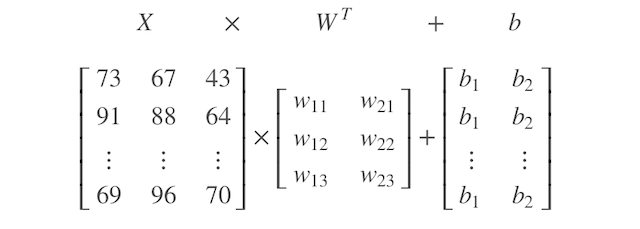

In [34]:
#queremos un modelo del tipo w1x1 + w2x2 +w3x3 =y1,y2
#generamos los pesos y los sesgos como random
weights = torch.randn(3, 2, requires_grad=True)
biases = torch.randn(5,2,requires_grad=True)
print(weights)
print(biases)

tensor([[ 0.2074,  0.7528],
        [ 1.3957, -0.1641],
        [-1.6290, -0.7731]], requires_grad=True)
tensor([[ 0.1835,  1.1571],
        [-1.5832,  1.8522],
        [-0.8171, -0.2833],
        [-1.0805, -1.2504],
        [ 0.4823, -0.1539]], requires_grad=True)


In [0]:
class Regression:

  def __init__(self, weights, biases):
    self.weights = weights
    self.biases = biases
  
  def model(self, x):
    return x @ weights + biases




In [37]:
#aplicamos el step forward y calculamos las predicciones con unos pesos aleatorios
reg = Regression(weights, biases)
out = reg.model(inputs)
print(out)

tensor([[ 38.7877,  11.8700],
        [ 35.8549,   6.4330],
        [109.7653,  -1.6226],
        [ 19.8165,  39.8693],
        [ 34.7490, -18.0854]], grad_fn=<AddBackward0>)


In [36]:
#si comparamos con los targets reales
print(targets)

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [0]:
#podemos calcular el error cuadratico medio com sum((target - out)2/2)
# MSE loss
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

In [42]:
loss = mse(targets, out)
print(loss)

tensor(5632.8501, grad_fn=<DivBackward0>)


In [0]:
#una vez calculado la funcion de error podemos hacer la retropropagacion del error en relacion a los pesos
loss.backward()

In [50]:
print(reg.weights.grad)
print(reg.biases.grad)

tensor([[-2220.0310, -6745.4961],
        [-2601.8853, -8658.5713],
        [-1804.6774, -5169.9609]])
tensor([[ -3.4425, -11.6260],
        [ -9.0290, -18.9134],
        [ -1.8469, -26.9245],
        [ -0.4367,   0.5739],
        [-13.6502, -27.4171]])


In [0]:
#aplicamos el descenso del gradiente como (w - rate * derivada)
# torch.nograd indica que no se deben hacer calculos de gradientes durante estas actualizaciones
with torch.no_grad():
    reg.weights -= reg.weights.grad * 1e-5
    reg.biases.grad -= reg.biases.grad * 1e-5
    reg.weights.grad.zero_()
    reg.biases.grad.zero_()

In [56]:
#comprobamos que los gradientes se han ajustado y no tienen grad
out_trained = reg.model(inputs)
out_trained

tensor([[ 42.9276,  24.8185],
        [ 41.3197,  23.4997],
        [116.2300,  18.8470],
        [ 23.8675,  52.3858],
        [ 40.0419,  -1.4998]], grad_fn=<AddBackward0>)

In [58]:
#generamos de nuevo el vector de error
loss = mse(targets, out_trained)
print(loss)

tensor(4155.5791, grad_fn=<DivBackward0>)
